In [1]:
# Conectar google colab con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
main_datasets_path = '/content/drive/MyDrive/MADRID/LSMA/Homework4/goodbooks-10k-master/'

In [3]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

In [4]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162991 sha256=8114fa4607400fb8b5220c32d43ca74219d291fecb7ea99c58a7583bc49b2861
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [5]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [6]:
r = pd.read_csv(main_datasets_path+'ratings.csv')
tr = pd.read_csv(main_datasets_path+'to_read.csv' )
b = pd.read_csv(main_datasets_path+'books.csv' )

t = pd.read_csv(main_datasets_path+'tags.csv' )
bt = pd.read_csv(main_datasets_path+'book_tags.csv')

#<font color='CC0000'>**I/ The Data**
<font color='white'>
The csv files contains severals data:<br>

*   **to_read.csv:** users_id; books_id
*   **tags.csv:** tag_id; tag_name
*   **ratings.csv:** user_id; book_id,rating
*   **books.csv:** book_id; goodreads_book_id; best_book_id; work_id; books_count; isbn; isbn13; authors; original_publication_year; original_title; title; language_code; average_rating; ratings_count; work_ratings_count; work_text_reviews_count; ratings_1; ratings_2; ratings_3; ratings_4; ratings_5; image_url; small_image_url
*   **book_tags.csv:** goodreads_book_id; tag_id; count

Basically, we can sum up the most important data that we will be using :



*   **Users:**
user_id
*   **Books:**
book_id; isbn; authors; original_publication_year; title; image_url
*   **Ratings:**
rating; book_id

In [7]:
# dimension of dataset
print(f'''\t  Book_df shape is {b.shape}
          Ratings_df shape is {r.shape}
          To_read_df shape is {tr.shape}
          tags shape is {t.shape}
          book_tags shape is {bt.shape}
      ''')

	  Book_df shape is (10000, 23)
          Ratings_df shape is (5976479, 3)
          To_read_df shape is (912705, 2)
          tags shape is (34252, 2)
          book_tags shape is (999912, 3)
      


#**1) Books_dataset**
<font color='white'>

In [8]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


We can plot the top 10 authors in terms of books written.

Text(0.5, 1.0, 'Top 10 Authors')

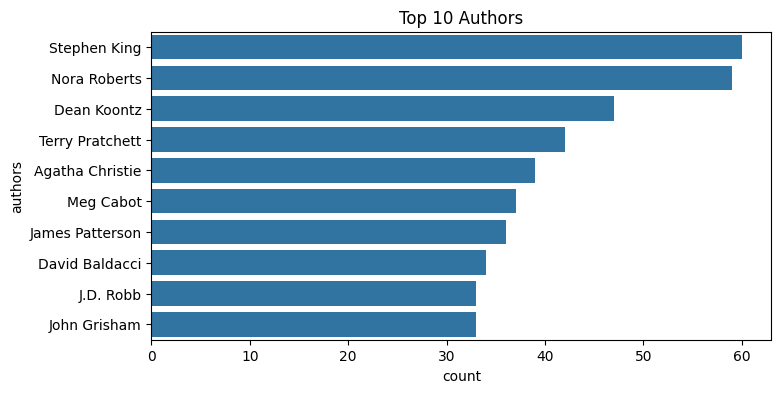

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(y='authors',data=b,order=pd.value_counts(b['authors']).iloc[:10].index)
plt.title('Top 10 Authors')

#**2) Rating Dataset**


In [10]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings dataset should have books only which exist in our books dataset

In [11]:
ratings_new = r[r.book_id.isin(b.book_id)]
r.shape,ratings_new.shape

((5976479, 3), (5976479, 3))

We can see that there is the same number of books in the two datasets (5 976 479 books)

Let's see how the ratings are distributed

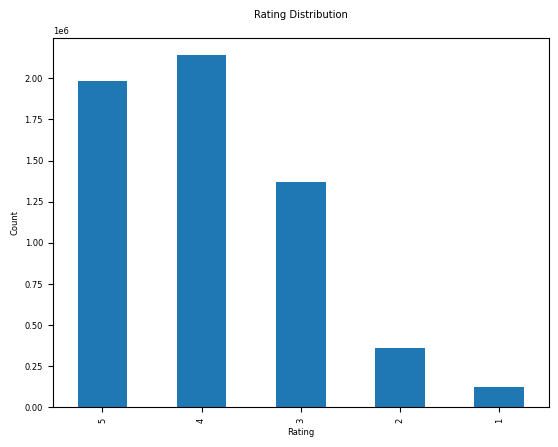

In [12]:
plt.rc("font", size=6)
ratings_new['rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

What we can see here, is that the ratings are moste likely to be up-noted (strictly superior at 3) amongs users, which can inform us about the fact that people do not make bad notes unless the books is truly bad ?

We may ask ouselves, what are the most rated books amongs users ?

In [13]:
book_rating_counts = r['book_id'].value_counts()
book_rating_counts = book_rating_counts.reset_index()
book_rating_counts.columns = ['book_id', 'rating_count']
most_rated_books = pd.merge(b, book_rating_counts, on='book_id')
most_rated_books = most_rated_books.sort_values('rating_count', ascending=False)
most_rated_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,rating_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,22806
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,21850
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,19088
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,16931
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,16604


We merged the most rated books of the dataset ratings.csv with the book_id of the dataset books.csv. We can see that the most rated book is "The Hunger Games" of Suzanne Collins.

We can obtain the average rating without the column of the dataset books.csv. Let's try something:

In [14]:
# Ensure that the 'book_id' columns in both DataFrames have the same data type
r['book_id'] = r['book_id'].astype(int)

# Create the 'Avg_Rating' and 'Total_No_Of_Users_Rated' columns in the ratings DataFrame
r['Avg_Rating'] = r.groupby('book_id')['rating'].transform('mean')
r['Total_No_Of_Users_Rated'] = r.groupby('book_id')['rating'].transform('count')

# Merge books and ratings on the 'book_id' column
book_ratings = pd.merge(b, r, on='book_id')

# Calculate the total number of ratings for each book using the value_counts() function
book_rating_counts = r['book_id'].value_counts()

# Reset the index of book_rating_counts to make it a column
book_rating_counts = book_rating_counts.reset_index()

# Rename the columns of book_rating_counts
book_rating_counts.columns = ['book_id', 'rating_count']

# Merge book_ratings and book_rating_counts on the 'book_id' column
most_rated_books = pd.merge(book_ratings, book_rating_counts, on='book_id')

# Remove duplicate rows based on the 'book_id' column
most_rated_books = most_rated_books.drop_duplicates(subset='book_id')

# Sort most_rated_books by 'rating_count' in descending order
most_rated_books = most_rated_books.sort_values('rating_count', ascending=False)

# Display the top N most rated books
N = 5  # Replace N with the number of books you want to display
most_rated_books.head(N)


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating,Avg_Rating,Total_No_Of_Users_Rated,rating_count
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2886,5,4.279707,22806,22806
22806,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,4,5,4.351350,21850,21850
61587,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,15,3,4.329369,19088,19088
44656,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,451,5,3.214341,16931,16931
80675,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4,4,3.772224,16604,16604


In [15]:
comparison = most_rated_books[['Avg_Rating', 'average_rating']]
print(comparison.head())

most_rated_books['rating_difference'] = most_rated_books['Avg_Rating'] - most_rated_books['average_rating']
print("Mean difference:", most_rated_books['rating_difference'].mean())
print("Median difference:", most_rated_books['rating_difference'].median())
print("Standard deviation of differences:", most_rated_books['rating_difference'].std())

       Avg_Rating  average_rating
0        4.279707            4.34
22806    4.351350            4.44
61587    4.329369            4.25
44656    3.214341            3.57
80675    3.772224            3.89
Mean difference: -0.09905506399132244
Median difference: -0.09173376274825551
Standard deviation of differences: 0.09653501591498236


We may conclude that our dataset are not perfectly coherent but that will do the job

#<font color='CC0000'>**II/ Popularity Based Filtering**
<font color='white'>


In [16]:
C= r['Avg_Rating'].mean()
m= r['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = r.loc[r['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=3.9198655261735182 , m=9960.0


(597967, 5)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.
We see that there are 597967 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [17]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [18]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('book_id').sort_index()
cm=sns.light_palette('red',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)
Top_Books_with_Titles = pd.merge(Top_Books, b[['book_id', 'title']], on='book_id')

#Printing the top 20 books
Top_Books_with_Titles[['title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)


,title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,"Harry Potter and the Deathly Hallows (Harry Potter, #7)",15304,4.525941,4.287004
1,"Harry Potter and the Half-Blood Prince (Harry Potter, #6)",15081,4.443339,4.235129
2,"Harry Potter and the Goblet of Fire (Harry Potter, #4)",15523,4.430780,4.231090
3,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",15855,4.418732,4.226258
4,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",21850,4.351350,4.216248
5,To Kill a Mockingbird,19088,4.329369,4.188958
6,"Harry Potter and the Order of the Phoenix (Harry Potter, #5)",15258,4.358697,4.185378
7,The Help,12727,4.382887,4.179612
8,"The Hunger Games (The Hunger Games, #1)",22806,4.279707,4.170325
9,"A Game of Thrones (A Song of Ice and Fire, #1)",10692,4.339880,4.137317


A popularity-based recommender system offers a broad selection of recommended books for all users, but it does not take into account the specific preferences and interests of individual users. Which is not the most pertinent methods.

#<font color='CC0000'>**III/ Model Based Collaborative Filtering Recommender**
<font color='white'>

#**1) SVD and NMF models**

This analysis will concentrate on providing book recommendations using the Book-Crossing dataset. In order to reduce the dataset's dimensionality and prevent memory errors, we will consider only users with a minimum of 3 ratings and the top 10% most frequently rated books. The recommender systems will be developed using the Surprise package, which employs matrix factorization-based models.

In [19]:
r.rename(columns = {'User-ID':'user_id' ,'book_id':'book_id' ,'Book-Rating':'rating'},inplace=True)

In [20]:
user_ratings_threshold = 3

filter_users = r['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = r[r['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 5976479


In [21]:
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['book_id'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['book_id'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['book_id'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 3179650


Comparison of SVD and NMF Models:

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are two matrix factorization techniques employed for reducing dimensionality. The Surprise package offers implementations of these algorithms.

In [43]:
# Reduce the size of the dataset
df = df_ratings_top.sample(frac=0.1, random_state=42)
smaller_df = pd.merge(df, b[['book_id', 'isbn', 'title']], on='book_id', how='left')

# Create the Surprise dataset from the reduced DataFrame
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)

In [23]:
# Create the SVD model
model_svd = SVD()

# Reduce the number of folds in cross-validation
cv_results_svd = cross_validate(model_svd, data, cv=2)

# Calculate the mean of the results
pd.DataFrame(cv_results_svd).mean()

test_rmse    0.954558
test_mae     0.763751
fit_time     3.296256
test_time    1.599387
dtype: float64

In [24]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=2)
pd.DataFrame(cv_results_nmf).mean()

test_rmse    1.136368
test_mae     0.900603
fit_time     8.330399
test_time    1.891815
dtype: float64

We observe that for the given dataset, much better results can be obtain using the SVD approach, even if we're working on a small part of the dataset.

#**2) Analysis of Collaborative Filtering model results**

Let's analyze the best RMSE provided by the SVD method

In [29]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [85]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

KeyError: 'details'

Based on this small sample, the model's performance seems to be mixed. In some cases, it predicts the ratings quite accurately, while in others, it underestimates or overestimates the ratings with higher errors. To get a better understanding of the model's overall performance, we should calculate and analyze the mean absolute error (MAE) and root mean squared error (RMSE) for the entire test set.

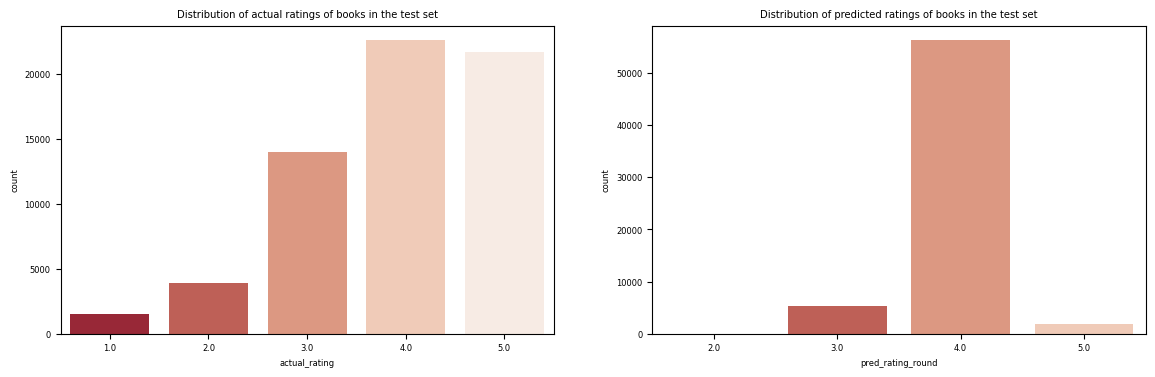

In [33]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

The model seems to have some limitations in capturing the true variability in the ratings data. It tends to overestimate ratings and predict a higher concentration of ratings around 4. To improve the model's performance, we might consider trying different algorithms, tuning hyperparameters, or addressing potential data imbalance issues. Additionally, evaluating the model using metrics like MAE and RMSE can provide further insights into its overall performance. Still, we can see that the SVD methods works well in terms of predicting the high score.

We will select an user in particular to check the recommendation method:

In [77]:
df_pred.head()

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
0,50372,165,4.0,3.839246,False,4.0,0.160754
1,26591,637,3.0,3.965550,False,4.0,0.965550
2,11599,13,4.0,4.390337,False,4.0,0.390337
3,20775,434,5.0,3.797572,False,4.0,1.202428
4,25920,158,4.0,3.984320,False,4.0,0.015680


In [88]:
selected_user_id = 11599
df_user = df_pred[df_pred['user_id']==selected_user_id]


df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,actual_rating,pred_rating,title
45353,11599,1,5.0,4.529731,{'was_impossible': False}
2,11599,13,4.0,4.390337,{'was_impossible': False}
52213,11599,1030,5.0,4.352756,{'was_impossible': False}
21830,11599,106,5.0,4.290702,{'was_impossible': False}
1935,11599,45,5.0,4.209243,{'was_impossible': False}
